In [1]:
import matplotlib.pyplot as plt
import numpy as np
from dispkernel import dispKernel

In [2]:
traindata = np.loadtxt('traindata.csv', delimiter=',')
trainlabel = np.loadtxt('trainlabel.csv', delimiter=',')
validdata = np.loadtxt('validdata.csv', delimiter=',')
validlabel = np.loadtxt('validlabel.csv', delimiter=',')

In [3]:
def linear(X, with_grad=True):
    if with_grad:
        dZ = np.ones_like(X)
        return X, dZ
    return X, None

def sigmoid(X, with_grad=True):
    Z = 1 / (1 + np.exp(-X))
    if with_grad:
        dZ = np.exp(-X) / (1 + np.exp(-X)) ** 2
        return Z, dZ
    return Z, None

def ReLU(X, with_grad=True):
    Z = np.max(X, 0)
    if with_grad:
        dZ = np.where(X > 0, 1, 0)
        return Z, dZ
    return Z, None

def mse_loss(Z, label, with_grad=True):
    L = np.sum((Z - label) ** 2)
    if with_grad:
        dLdZ = 2 * (Z - label)
        return L, dLdZ
    return L, None

In [4]:
class Model:
    def __init__(self, activation):
        self.activation = activation
        self.weights = np.random.standard_normal(9)
        self.bias = np.random.standard_normal()

    def forward(self, X, with_grad=True):
        Y = self.weights.dot(X) + self.bias
        Z, dZ = self.activation(Y, with_grad)
        if with_grad:
            dYdW = X
            dYdb = 1
            dZdW = dZ * dYdW
            dZdb = dZ * dYdb
            return Z, dZdW, dZdb  
        return Z, None, None

In [5]:
def train(traindata, trainlabel, validdata, validlabel, activation, lr, epochs, debug=False):
    neuron = Model(activation)
    train_loss = []
    train_acc = []
    val_loss = []
    val_acc = []

    for i in range(1, epochs + 1):
        Z, dZdW, dZdb = neuron.forward(traindata.T)
        L, dLdZ = mse_loss(Z, trainlabel, with_grad=True)
        train_loss.append(L)
        train_acc.append(((Z >= 0.5) == trainlabel).sum() / trainlabel.size)

        dLdW = np.sum(dLdZ * dZdW, axis=1)
        dLdb = np.sum(dLdZ * dZdb, axis=0)

        neuron.weights -= dLdW * lr
        neuron.bias -= dLdb * lr

        val_out, _, _ = neuron.forward(validdata.T, with_grad=False)
        val_loss.append(mse_loss(val_out, validlabel, with_grad=False)[0])
        val_acc.append(((val_out >= 0.5) == validlabel).sum() / validlabel.size)

        if debug:
            print('epoch {}, train loss {:2f} acc {:2f} validation loss {:2f} acc {:2f}'.format(i, L, train_acc[-1], val_loss[-1], val_acc[-1]))
    
    return neuron, train_loss, train_acc, val_loss, val_acc

def plot_history(train_loss, train_acc, val_loss, val_acc):
    plt.subplot(1, 2, 1)
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.subplot(1, 2, 2)
    plt.plot(train_acc)
    plt.plot(val_acc)

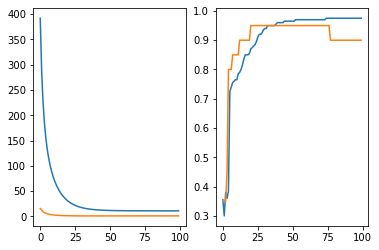

In [21]:
neuron, train_loss, train_acc, val_loss, val_acc = train(traindata, trainlabel, validdata, validlabel, linear, 0.001, 100)
plot_history(train_loss, train_acc, val_loss, val_acc)

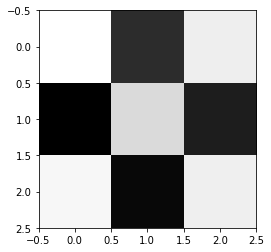

In [22]:
dispKernel(neuron.weights, 3, 3)

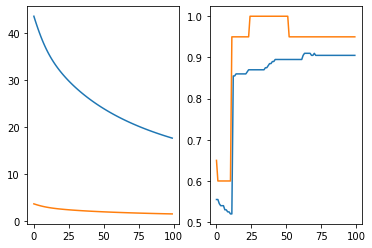

In [8]:
neuron, train_loss, train_acc, val_loss, val_acc = train(traindata, trainlabel, validdata, validlabel, sigmoid, 0.001, 100)
plot_history(train_loss, train_acc, val_loss, val_acc)

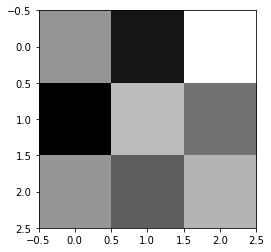

In [9]:
dispKernel(neuron.weights, 3, 3)

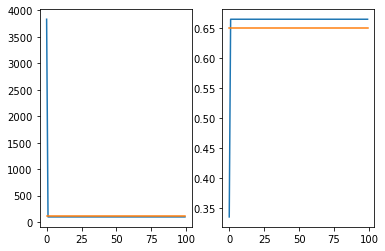

In [10]:
neuron, train_loss, train_acc, val_loss, val_acc = train(traindata, trainlabel, validdata, validlabel, ReLU, 0.001, 100)
plot_history(train_loss, train_acc, val_loss, val_acc)

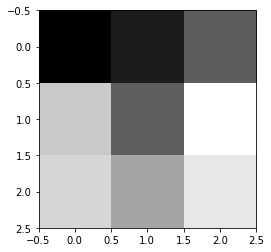

In [11]:
dispKernel(neuron.weights, 3, 3)